# **WorkFlow:**

# Problem Statement: Stock Market Price Prediction using ANN

1- Dataset: Stock Market

   No. of Samples: 5804

   Target Column: 'Adjusted Close' having continuous prices values

2- Import the dataset,extract the features from its 'date' column, split the data into train,test,val. then apply scaling on its features.

3- Create the tensors and then the tensor dataset.

4- Forward Pass: Then create a neural network model having hidden layers and units of choice. and every unit will update the weights and apply relu activation on it.

5- Loss calculation: And then the loss will be calculated on the predictions that our model has made after the training in forward pass.

6- And then we are making gradients zero after each iteration.

7- Back Propagation: During back propagation the gradients will be calculated and weights will be updated in the .step() method.

8- After being trained in several epochs, we will test the model and will plot the actual vs predictions


In [107]:
#importing the dependencies
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [108]:
#importing the dataset
df=pd.read_csv('A.csv')
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-11-1999,28.612303,32.546494,62546380,35.765381,31.473534,27.066582
1,19-11-1999,28.478184,30.713518,15234146,30.758226,28.880545,24.836662
2,22-11-1999,28.657009,29.551144,6577870,31.473534,31.473534,27.066582
3,23-11-1999,28.612303,30.400572,5975611,31.205294,28.612303,24.605980
4,24-11-1999,28.612303,28.701717,4843231,29.998213,29.372318,25.259573


In [109]:
df.shape

(5804, 7)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5804 non-null   object 
 1   Low             5804 non-null   float64
 2   Open            5804 non-null   float64
 3   Volume          5804 non-null   int64  
 4   High            5804 non-null   float64
 5   Close           5804 non-null   float64
 6   Adjusted Close  5804 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 317.5+ KB


# **Data Preprocessing:**

In [111]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=df.drop(['Adjusted Close'],axis=1)
y=df['Adjusted Close']

X['Day']=X['Date'].dt.day
X['Month']=X['Date'].dt.month
X['Year']=X['Date'].dt.year
X=X.drop(['Date'],axis=1)

x_train,x_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.33,random_state=42)

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [113]:
x_train=torch.tensor(x_train,dtype=torch.float32)
x_val=torch.tensor(x_val,dtype=torch.float32)
x_test=torch.tensor(x_test,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32).unsqueeze(1)
y_val=torch.tensor(y_val.values,dtype=torch.float32).unsqueeze(1)
y_test=torch.tensor(y_test.values,dtype=torch.float32).unsqueeze(1)


training_data=TensorDataset(x_train,y_train)
val_data=TensorDataset(x_val,y_val)
test_data=TensorDataset(x_test,y_test)

## Model:

In [114]:
class Linear_layer(nn.Module):
  def __init__(self,input_size,output_size):
    super(Linear_layer,self).__init__()
    self.weights=nn.Parameter(torch.randn(input_size,output_size))
    self.bias=nn.Parameter(torch.randn(output_size))

  def forward(self,x):
    return torch.matmul(x,self.weights)+self.bias


class Relu(nn.Module):
  def __init(self):
    super(Relu,self).__init__()

  def forward(self,x):
    return torch.max(x,torch.tensor(0.0))

In [115]:
class NeuralNetwork(nn.Module):
  def __init__(self,input_size,hidden_layers,output_size):
    super(NeuralNetwork,self).__init__()
    layers=[]
    previous_size=input_size
    for layer_units in hidden_layers:
      layers.append(Linear_layer(previous_size,layer_units))
      layers.append(Relu())
      previous_size=layer_units

    layers.append(Linear_layer(previous_size,output_size))
    self.model=nn.Sequential(*layers)

  def forward(self,x):
    return self.model(x)


# Model Training:

In [116]:
def train_model(model,train_data,batch_size,n_epochs,loss_fn,optimizer):
  data_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)

  losses=[]
  for epoch in range(n_epochs):
    for x_batch,y_batch in data_loader:
      y_pred=model(x_batch)
      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    losses.append(loss.item())

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

  return model,losses

In [120]:
hidden_layers=[256,128,64,32,16,8,4]
model=NeuralNetwork(x_train.shape[1],hidden_layers,1)
batch_size=128
n_epochs=100
loss_fn=nn.MSELoss(reduction='mean')
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

trained_model,losses_for_train=train_model(model,training_data,batch_size,n_epochs,loss_fn,optimizer)


Epoch 1, Loss: 1802.0392
Epoch 2, Loss: 113.4740
Epoch 3, Loss: 14.3368
Epoch 4, Loss: 8.6294
Epoch 5, Loss: 4.9288
Epoch 6, Loss: 3.7876
Epoch 7, Loss: 3.5010
Epoch 8, Loss: 1.6171
Epoch 9, Loss: 1.9997
Epoch 10, Loss: 1.6606
Epoch 11, Loss: 1.5108
Epoch 12, Loss: 1.2398
Epoch 13, Loss: 1.4467
Epoch 14, Loss: 1.0304
Epoch 15, Loss: 0.8636
Epoch 16, Loss: 1.0401
Epoch 17, Loss: 0.8916
Epoch 18, Loss: 0.9525
Epoch 19, Loss: 0.8269
Epoch 20, Loss: 0.8001
Epoch 21, Loss: 1.6728
Epoch 22, Loss: 0.4874
Epoch 23, Loss: 0.5626
Epoch 24, Loss: 0.6344
Epoch 25, Loss: 0.5007
Epoch 26, Loss: 0.6789
Epoch 27, Loss: 0.6296
Epoch 28, Loss: 0.6572
Epoch 29, Loss: 0.4091
Epoch 30, Loss: 0.5459
Epoch 31, Loss: 0.5534
Epoch 32, Loss: 0.6278
Epoch 33, Loss: 0.4696
Epoch 34, Loss: 0.7399
Epoch 35, Loss: 0.6474
Epoch 36, Loss: 0.4651
Epoch 37, Loss: 0.4500
Epoch 38, Loss: 0.5717
Epoch 39, Loss: 0.4338
Epoch 40, Loss: 0.4648
Epoch 41, Loss: 0.3914
Epoch 42, Loss: 0.4718
Epoch 43, Loss: 0.6102
Epoch 44, Loss

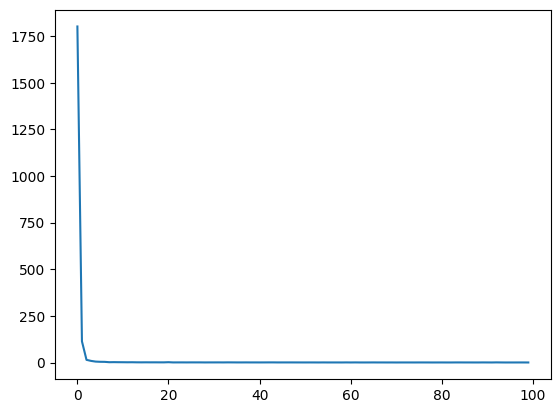

In [121]:
plt.plot(losses_for_train)
plt.show()

# **Testing the Model:**

In [122]:
def test_model(model, test_data):

    model.eval()

    test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)
    predictions = []
    actuals = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            yhat = model(x_batch)
            predictions.append(yhat.numpy())
            actuals.append(y_batch.numpy())

    # Concatenate results
    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)

    return predictions, actuals


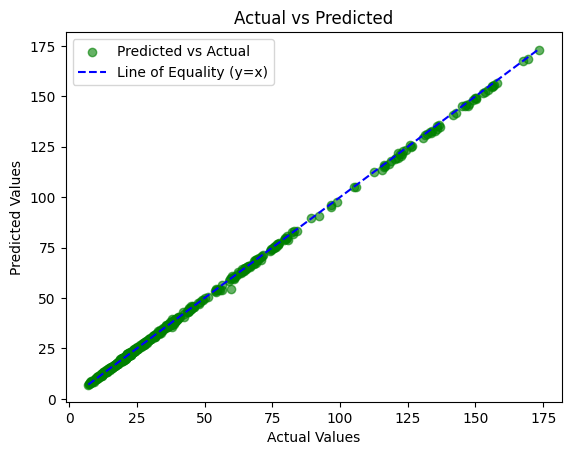

In [123]:
# Scatter plot with line of equality
predictions, actuals = test_model(model, test_data)
plt.scatter(actuals, predictions, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='blue', linestyle='--', label='Line of Equality (y=x)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


In [124]:
predictions = torch.tensor(predictions, dtype=torch.float32)
actuals = torch.tensor(actuals, dtype=torch.float32)

loss = loss_fn(predictions, actuals)
print('MSE: ',loss.item())
mae_loss=nn.L1Loss(reduction='mean')
mae=mae_loss(predictions,actuals)
print('MAE: ',mae.item())


MSE:  0.4569740295410156
MAE:  0.4856134355068207
